# Image visualisation

In [1]:
from PIL import Image

im=Image.open("../raw_data/images/100k/train/0a0a0b1a-7c39d841.jpg")
width, height=im.size

In [2]:
import matplotlib.image as img
image = img.imread("../raw_data/images/100k/train/0a0a0b1a-7c39d841.jpg")

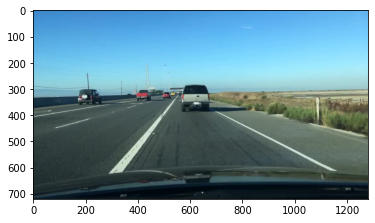

In [3]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [4]:
import os
directory = '../raw_data/images/100k/train/'

size_w=[]
size_h=[]
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        im=Image.open("../raw_data/images/100k/train/"+filename)
        width, height=im.size
        size_w.append(width)
        size_h.append(height)
    else:
        pass

**Image size:**

In [5]:
set(size_h)

{720}

In [6]:
set(size_w)

{1280}

In [7]:
import pandas as pd
import json

In [8]:
with open('../raw_data/labels/bdd100k_labels_images_train.json') as f:
    full_data = json.load(f)

**data loading:**

In [55]:
full_data[0]

{'name': '0000f77c-6257be58.jpg',
 'attributes': {'weather': 'clear',
  'scene': 'city street',
  'timeofday': 'daytime'},
 'timestamp': 10000,
 'labels': [{'category': 'traffic light',
   'attributes': {'occluded': False,
    'truncated': False,
    'trafficLightColor': 'green'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 1125.902264,
    'y1': 133.184488,
    'x2': 1156.978645,
    'y2': 210.875445},
   'id': 0},
  {'category': 'traffic light',
   'attributes': {'occluded': False,
    'truncated': False,
    'trafficLightColor': 'green'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 1156.978645,
    'y1': 136.637417,
    'x2': 1191.50796,
    'y2': 210.875443},
   'id': 1},
  {'category': 'traffic sign',
   'attributes': {'occluded': False,
    'truncated': False,
    'trafficLightColor': 'none'},
   'manualShape': True,
   'manualAttributes': True,
   'box2d': {'x1': 1101.731743,
    'y1': 211.122087,
    'x2': 1170.79037,
    

In [28]:
full_data[0].keys()

dict_keys(['name', 'attributes', 'timestamp', 'labels'])

In [35]:
len(full_data)

69863

# Objects per image distribution

In [60]:
# Objects per image distribution
target_cats=['car', 'traffic light', 'traffic sign', 'person', 'bus', 'bike']
img2nboxes = {} # mapping "image name" to "number of boxes"

for img in full_data:
    img_id=img["name"]
#     nboxes=len(img["labels"])
    nboxes=0
    target_count=img["labels"]
    for dict_lab in target_count:
        if dict_lab["category"] in target_cats:
            nboxes+=1
        else:
            nboxes+=0    
    img2nboxes[img_id]=nboxes
nboxes_list = list(img2nboxes.values())

min_nboxes = min(nboxes_list)
max_nboxes = max(nboxes_list)
avg_nboxes = int(sum(nboxes_list)/len(nboxes_list))

In [64]:
sum(value == 0 for value in img2nboxes.values())

8

In [44]:
import numpy as np

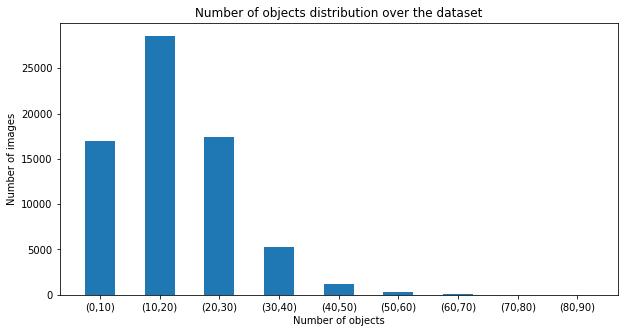

Number of images having atleast one box:  69863
Min number of boxes per image:  0
Max number of boxes per image:  87
Avg number of boxes per image:  17


In [61]:
out = pd.cut(nboxes_list, bins=np.arange(0,max_nboxes+10,10), include_lowest=True)

counts = out.value_counts().values
labels = [(int(i.left),int(i.right)) for i in out.value_counts().index.categories]

graph_xind = [i[0] for i in labels] 
ticks = [ '('+str(i[0])+','+ str(i[1])+')' for i in labels]

plt.figure(figsize=(10,5))
plt.bar(graph_xind, counts, tick_label=ticks, width=5)
plt.xlabel('Number of objects')
plt.ylabel('Number of images')
plt.title('Number of objects distribution over the dataset')
plt.show()

print("Number of images having atleast one box: ", len(nboxes_list))
print("Min number of boxes per image: ", min_nboxes)
print("Max number of boxes per image: ", max_nboxes)
print("Avg number of boxes per image: ", avg_nboxes)

In [10]:
df=pd.json_normalize(full_data, record_path=["labels"], meta=['name'])

# Label analysis

In [11]:
weather_type = []
for photo in full_data:
    weather_type.append(photo["attributes"]["weather"])


weather_set=set(weather_type)

weather_cat_dict={}
for weather in weather_set:
    weather_cat_dict[weather]=weather_type.count(weather)
sorted_weather_cat_dict = {k: v for k, v in sorted(weather_cat_dict.items(), key=lambda item: item[1], reverse=True)}

In [22]:
import matplotlib.pyplot as plt

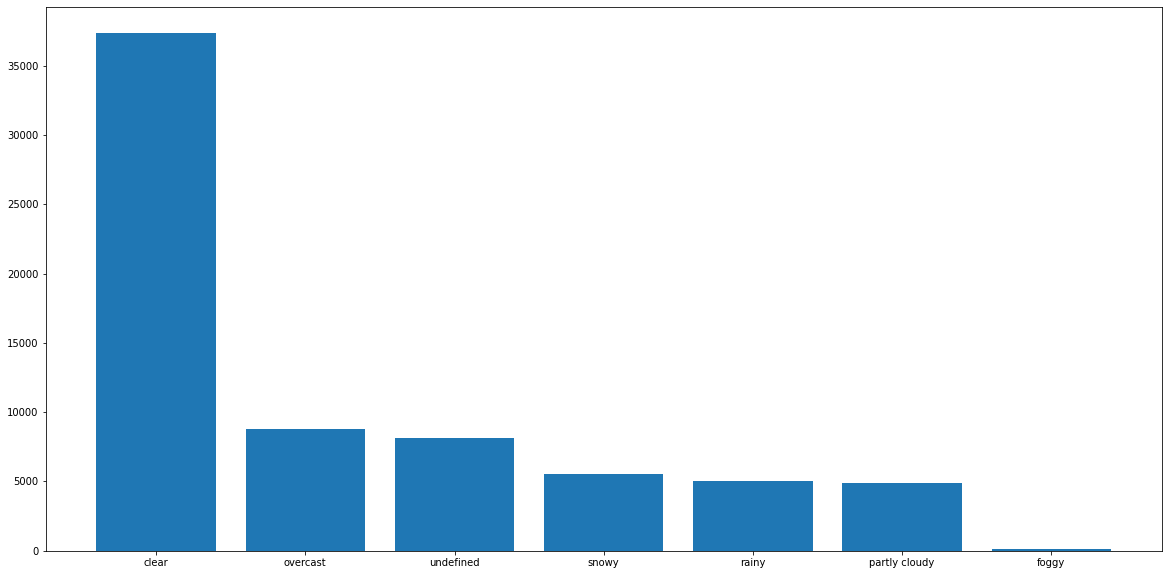

In [21]:
plt.figure(figsize=(20,10))
plt.bar(sorted_weather_cat_dict.keys(),sorted_weather_cat_dict.values())
plt.show()

In [23]:
timeofday = []
for photo in full_data:
    timeofday.append(photo["attributes"]["timeofday"])
timeofday_set=set(timeofday)
timeofday_dict={}
for timeofday_ in timeofday_set:
    timeofday_dict[timeofday_]=timeofday.count(timeofday_)
sorted_timeofday_dict = {k: v for k, v in sorted(timeofday_dict.items(), key=lambda item: item[1], reverse=True)}

<BarContainer object of 4 artists>

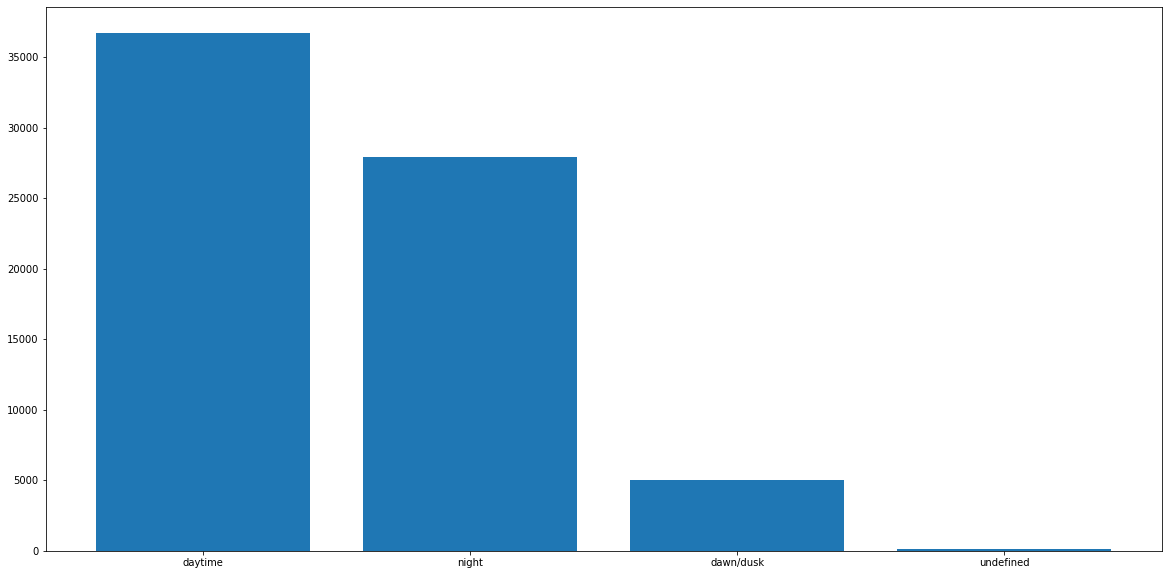

In [24]:
plt.figure(figsize=(20,10))
plt.bar(sorted_timeofday_dict.keys(),sorted_timeofday_dict.values())

In [25]:
scene = []
for photo in full_data:
    scene.append(photo["attributes"]["scene"])
scene_set=set(scene)
scene_dict={}
for scene_ in scene_set:
    scene_dict[scene_]=scene.count(scene_)
sorted_scene_dict = {k: v for k, v in sorted(scene_dict.items(), key=lambda item: item[1], reverse=True)}

<BarContainer object of 7 artists>

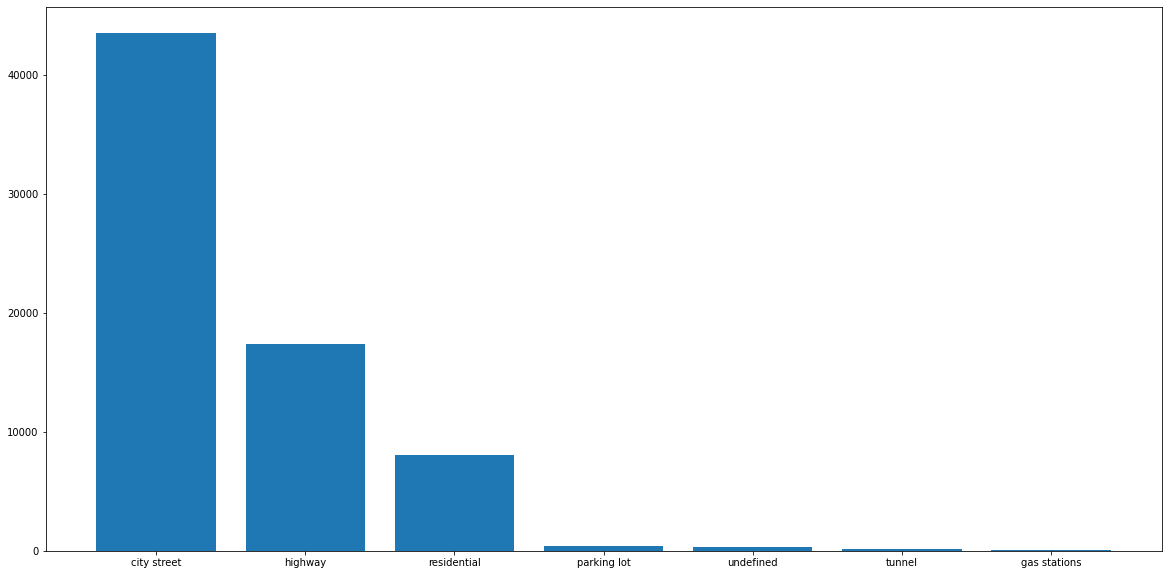

In [26]:
plt.figure(figsize=(20,10))
plt.bar(sorted_scene_dict.keys(),sorted_scene_dict.values())